In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # Uniformly distributed between (-3, +3)
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

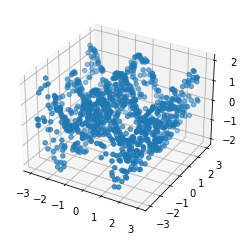

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

In [4]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile & fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9956
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9191
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8893
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8845
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8085
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7587
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7066
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6117
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5807
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5462
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5281
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5054
Epoch 13/100
32/32 [=================

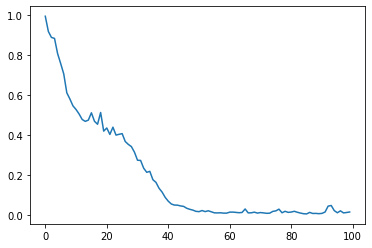

In [5]:
plt.plot(r.history['loss'], label='loss')

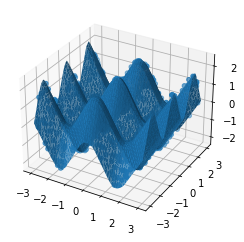

In [6]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
X_grid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat  = model.predict(X_grid).flatten()
ax.plot_trisurf(X_grid[:, 0], X_grid[:, 1], y_hat, linewidth=0.3, antialiased=True)
plt.show()